In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

In [111]:
train=pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [112]:
test=pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv')

In [ ]:
train.head()

In [ ]:
test.shape

In [ ]:
train.shape

In [ ]:
train.info()

In [ ]:
train['label'].value_counts()

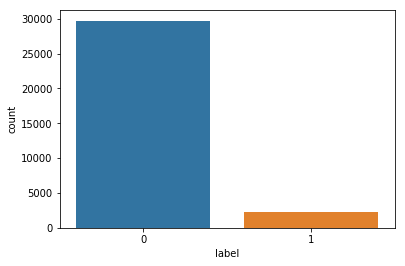

In [113]:
sns.countplot(train['label'])

# Lemmatization of the data (Data Preprocessing)

In [158]:
from nltk.stem.wordnet import WordNetLemmatizer

In [167]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return ' '.join(normalized_tweet)
    
train['lem_tweet']=train['tweet'].str.split().apply(normalization)
#print(normalization(tweet_list))

In [168]:
train.head()

,id,label,tweet,lem_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father be dysfunctional and be so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thank for #lyft credit i can't use...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [178]:
X=train['lem_tweet']
y=train['label']

# Vectorization of the features after removing the english stop words

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [179]:
vect=CountVectorizer(stop_words='english')
vect.fit(X,y)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [180]:
vect.vocabulary_

{'user': 36738,
 'father': 12460,
 'dysfunctional': 10908,
 'selfish': 30938,
 'drag': 10597,
 'kid': 19394,
 'dysfunction': 10907,
 'run': 30104,
 'thank': 34613,
 'lyft': 21425,
 'credit': 8632,
 'use': 36729,
 'cause': 6641,
 'don': 10410,
 'offer': 25275,
 'wheelchair': 38053,
 'vans': 36879,
 'pdx': 26447,
 'disapointed': 10049,
 'getthanked': 14381,
 'bihday': 4571,
 'majesty': 21631,
 'model': 22965,
 'love': 21081,
 'time': 35198,
 'urð': 36712,
 'factsguide': 12227,
 'society': 32247,
 'motivation': 23269,
 'huge': 16920,
 'fan': 12342,
 'fare': 12375,
 'big': 4509,
 'talk': 34111,
 'leave': 20152,
 'chaos': 6883,
 'pay': 26390,
 'dispute': 10160,
 'allshowandnogo': 2054,
 'camp': 6255,
 'tomorrow': 35417,
 'dannyâ': 9172,
 'school': 30636,
 'year': 39010,
 'exams': 11932,
 'think': 34978,
 'hate': 15898,
 'imagine': 17427,
 'actorslife': 1423,
 'revolutionschool': 29540,
 'girl': 14503,
 'won': 38535,
 'land': 19892,
 'allin': 2024,
 'cavs': 6653,
 'champions': 6845,
 'clevel

In [181]:
X_trans=vect.transform(X)

In [182]:
X_trans.shape

(31962, 39609)

In [119]:
type(X_trans)

scipy.sparse.csr.csr_matrix

# Model Building with multinomial naive bayes algorithm

In [186]:
model=MultinomialNB()

model.fit(X_trans,y)


y_pred_class = model.predict(X_trans)
accuracy_score(y,y_pred_class)



0.9727801764595457

In [187]:
print(classification_report(y_pred_class,y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     30084
           1       0.72      0.87      0.79      1878

    accuracy                           0.97     31962
   macro avg       0.86      0.92      0.89     31962
weighted avg       0.98      0.97      0.97     31962



# Vectorizing the test sample

In [136]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [189]:
X_test=test['tweet']

vect_test = CountVectorizer(vocabulary=vect.vocabulary_)
X_test_trans = vect_test.transform(X_test)



# Prediction with the test data

In [190]:
y_pred_test=model.predict(X_test_trans)

In [191]:
y_pred_test.shape

(17197,)

In [192]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=['label'])
y_pred_test_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [193]:
id_df=test['id']
id_df.head()

0    31963
1    31964
2    31965
3    31966
4    31967
Name: id, dtype: int64

In [194]:
test_classification_submission=pd.concat([id_df,y_pred_test_df],axis=1)

In [195]:
test_classification_submission.to_csv('test_class_submission_lem.csv',index=False)